In [44]:
from copy import deepcopy

In [1]:
from pam.read import read_matsim
from pam.core import Population, Household, Person
from pam.activity import Plan, Activity, Leg
from pam.utils import minutes_to_datetime as mtdt
from pam.variables import END_OF_DAY

In [6]:
test_plans = read_matsim("../tests/test_data/test_matsim_plansv12.xml", version=12)

In [11]:
test_plans.households

{'chris': <pam.core.Household at 0x11ce4c4e0>,
 'fatema': <pam.core.Household at 0x11ce3c550>,
 'fred': <pam.core.Household at 0x11c19a9e8>,
 'gerry': <pam.core.Household at 0x11c1b3a20>,
 'nick': <pam.core.Household at 0x11c7067f0>}

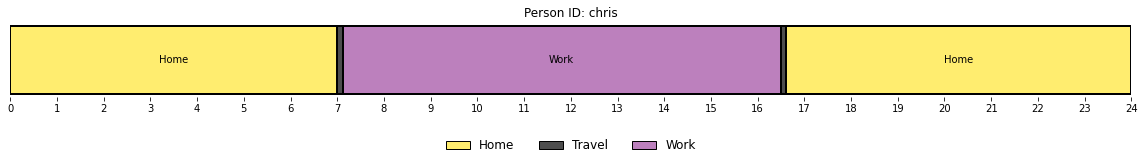

In [13]:
test_plans['chris']['chris'].plot()

In [ ]:
from pam.scoring import CharyparNagelPlanScorer

config = {
    'mUM': 1,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': 0,
    'lateArrival': -18,
    'earlyDeparture': -0,
    'work': {
        'typicalDuration': '12:00:00',
        # 'openingTime': '06:00:00',
        # 'closingTime': '20:00:00',
        # 'latestStartTime': '09:30:00',
        # 'earliestEndTime': '16:00:00'
        },
    'home': {
        'typicalDuration': '12:00:00'
        },
    'shop': {
        'typicalDuration': '00:30:00',
        'openingTime': '06:00:00',
        'closingTime': '20:00:00'
        },
    'car': {
        'constant': -10,
        'dailyMonetaryConstant': -0,
        'dailyUtilityConstant': -0,
        'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -0,
        'monetaryDistanceRate': -0.0001
        },
    'walk': {
        'constant': -5,
        'marginalUtilityOfTravelling': -1,
        }
    }

In [28]:
personA = Person('A', attributes={'age': 20})
personA.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(420)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(480), end_time=mtdt(510)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(510), end_time=mtdt(540), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(540), end_time=mtdt(1020)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1020), end_time=mtdt(1140), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1140), end_time=END_OF_DAY)
]

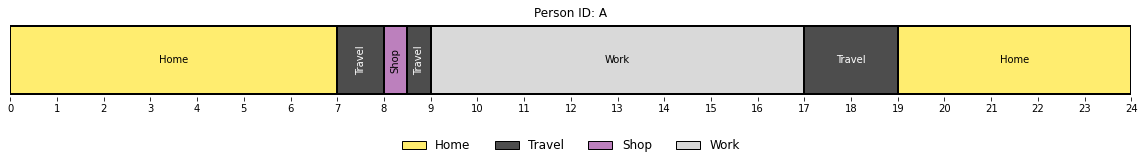

In [29]:
personA.plot()

In [77]:
personB = Person('b', attributes={'age': 20})
personB.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(240)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(240), end_time=mtdt(300), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(300), end_time=mtdt(360)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(360), end_time=mtdt(420), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(420), end_time=mtdt(1200)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1200), end_time=mtdt(1260), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1260), end_time=END_OF_DAY)
]

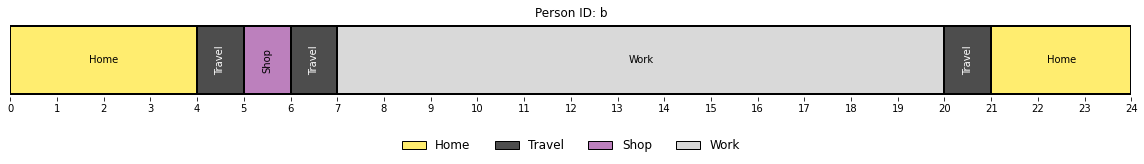

In [78]:
personB.plot()

In [79]:
from pam.scoring import CharyparNagelPlanScorer

In [80]:
config = {
    'mUM': 10,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': 0,
    'lateArrival': -18,
    'earlyDeparture': -10,
    'work': {
        'typicalDuration': '08:00:00',
        'openingTime': '06:00:00',
        'closingTime': '20:00:00',
        'latestStartTime': '09:30:00',
        'earliestEndTime': '16:00:00'
        },
    'home': {
        'typicalDuration': '12:00:00'
        },
    'shop': {
        'typicalDuration': '00:30:00',
        'openingTime': '06:00:00',
        'closingTime': '20:00:00'
        },
    'car': {
        'constant': -10,
        'dailyMonetaryConstant': -0,
        'dailyUtilityConstant': -0,
        'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -0,
        'monetaryDistanceRate': -0.0001
        },
    'walk': {
        'constant': -5,
        'marginalUtilityOfTravelling': -1,
        }
    }

In [81]:
scorer = CharyparNagelPlanScorer()

In [82]:
print(scorer.score(personA.plan, cnfg=config))
print(scorer.score(personB.plan, cnfg=config))

103.76307495249462
76.29362417991327


In [83]:
from pam.policy import *

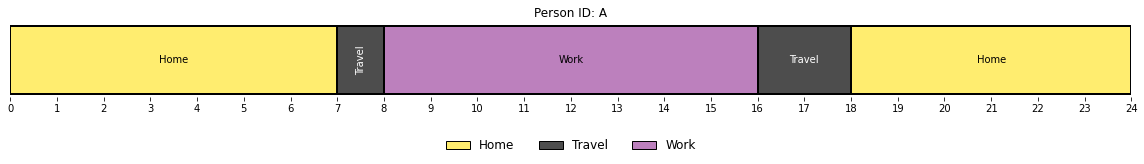

In [84]:
modifier = RemoveActivity(["shop"])
modifier.apply_to(household=None, person=personA)
personA.plot()

In [85]:
scorer.score(personA, cnfg=config)

103.76307495249462

In [89]:
from matplotlib import pyplot as plt
from pam.optimise.random import reschedule

In [103]:
plan, log = reschedule(
    personB.plan,
    plans_scorer=scorer,
    config=config,
    patience=10000
    )

Initial best score at iteration 0: 76.29362417991327
New best score at iteration 30: 83.97071673986642
New best score at iteration 42: 88.9605878718956
New best score at iteration 298: 92.50713971450524
New best score at iteration 470: 93.10726682496049
New best score at iteration 1035: 93.49122001568736
New best score at iteration 2574: 94.48167218946239
New best score at iteration 2922: 94.72169678317057
New best score at iteration 3491: 96.81397155847867
New best score at iteration 6400: 97.28574259980624
New best score at iteration 8581: 98.91299873584106
New best score at iteration 9774: 99.38330648605341


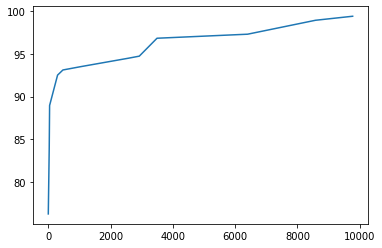

In [104]:
plt.plot(list(log.keys()), list(log.values()))

In [107]:
plan.print()

0:	Activity(None act:home, location:1, time:00:00:00 --> 03:59:09, duration:3:59:09)
1:	Leg(None mode:car, area:1 --> 2, time:03:59:09 --> 04:59:09, duration:1:00:00)
2:	Activity(None act:shop, location:2, time:04:59:09 --> 04:59:27, duration:0:00:18)
3:	Leg(None mode:walk, area:2 --> 3, time:04:59:27 --> 05:59:27, duration:1:00:00)
4:	Activity(None act:work, location:3, time:05:59:27 --> 05:59:27, duration:0:00:00)
5:	Leg(None mode:car, area:3 --> 1, time:05:59:27 --> 06:59:27, duration:1:00:00)
6:	Activity(None act:home, location:1, time:06:59:27 --> 00:00:00, duration:17:00:33)
